Gregor von Laszewski, laszewski@gmail.com

This notebook is on colab at

https://colab.research.google.com/drive/1JnInHMrUXo6KSSv9xFSkn-6E379yHfWY?usp=sharing

It is originated from

https://towardsdatascience.com/creating-a-simple-folium-map-covid-19-worldwide-total-case-a0a1429c6e7c

However, it contains a library for getting the data and displaying it. This way the notebook
can be kept as a minimum.

Todo: convert this script from folium to bokeh

In [1]:
! pip install folium

In [2]:
! pip install cloudmesh-covid -U

Requirement already up-to-date: cloudmesh-covid in /home/blue/ENV38/lib/python3.8/site-packages (4.4.7)


In [3]:
import folium
import requests
import pandas as pd
import numpy as np
from pprint import pprint

In [4]:
from cloudmesh.covid.data.world import get_covid_data
from cloudmesh.covid.data.world import plot_map
from cloudmesh.covid.data.world import add_log

In [5]:

df = get_covid_data()
df

,country,code,total_cases,total_recovered,total_unresolved,total_deaths,total_new_cases_today,total_new_deaths_today,total_active_cases,total_serious_cases
1,Afghanistan,AF,39290,32842,0,1458,5,0,0,4990
2,Albania,AL,13965,8342,0,389,159,1,265,5234
3,Algeria,DZ,51690,36282,0,1741,0,0,0,13667
4,Angola,AO,5114,2082,0,185,0,0,0,2847
5,Argentina,AR,765002,603140,0,20288,0,0,0,141574
...,...,...,...,...,...,...,...,...,...,...
178,Iran,IR,464596,385264,0,26567,3552,187,1896,52765
179,North Korea,KP,0,0,0,0,0,0,0,0
180,Russia,RU,1194643,970296,0,21077,9412,186,6054,203270
181,United Arab Emirates,AE,96529,86071,0,424,1181,3,1168,10034


In [6]:

data = df[["country", "total_cases"]]
data = data.sort_values(by='total_cases', ascending=False, na_position='first')

data

,country,total_cases
164,United States of America,7520529
72,India,6438968
20,Brazil,4856024
180,Russia,1194643
32,Colombia,835339
...,...,...
87,Laos,0
179,North Korea,0
83,Korea,0
34,Democratic Republic of the Congo,0


In [7]:
print(data['total_cases'].values)

[7520529 6438968 4856024 1194643  835339  818297  810807  765002  748315
  676084  589653  467146  466590  464596  372259  366383  335578  321512
  319908  316678  313431  297864  295499  258920  217661  162320  138584
  135716  132001  127922  126164  126044  121059  113350  113342  108044
  106087  103317   98585   96529   95773   94283   93090   85424   84215
   82450   79421   77598   77284   76988   76828   76029   76017   59001
   57794   57454   55016   54384   51690   51382   47056   46656   46374
   42173   41799   40766   40453   39290   38923   37063   35717   33735
   29175   28932   28631   27975   27109   21096   20838   19755   19721
   19346   18363   17160   16493   15525   15051   14830   14149   13965
   13653   13650   11771   11690   11617   11373   10652   10244    9968
    9852    8979    8781    8766    8709    8491    7850    7505    7093
    6704    6593    6103    5779    5670    5417    5170    5114    5105
    5089    5045    4956    4891    4843    4613   

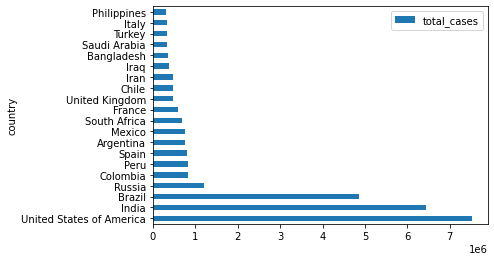

In [8]:
ax = data.head(20).plot.barh(x='country', y='total_cases')


In [9]:
df = add_log(df, 'total_cases')
df = add_log(df, 'total_deaths')

df

,country,code,total_cases,total_recovered,total_unresolved,total_deaths,total_new_cases_today,total_new_deaths_today,total_active_cases,total_serious_cases,log_total_cases,log_total_deaths
1,Afghanistan,AF,39290,32842,0,1458,5,0,0,4990,15,10
2,Albania,AL,13965,8342,0,389,159,1,265,5234,13,8
3,Algeria,DZ,51690,36282,0,1741,0,0,0,13667,15,10
4,Angola,AO,5114,2082,0,185,0,0,0,2847,12,7
5,Argentina,AR,765002,603140,0,20288,0,0,0,141574,19,14
...,...,...,...,...,...,...,...,...,...,...,...,...
178,Iran,IR,464596,385264,0,26567,3552,187,1896,52765,18,14
179,North Korea,KP,0,0,0,0,0,0,0,0,0,0
180,Russia,RU,1194643,970296,0,21077,9412,186,6054,203270,20,14
181,United Arab Emirates,AE,96529,86071,0,424,1181,3,1168,10034,16,8


In [10]:
m = plot_map("Death", df, "total_deaths")
m

NameError: name 'folium' is not defined

In [ ]:
m = plot_map("Log Death", df, "log_total_deaths")
m

In [ ]:
m = plot_map("Cases", df, "total_cases")
m

In [ ]:
m = plot_map("Log Cases", df, "log_total_cases")
m

In [ ]:
m = plot_map("Log Cases", df, "log_total_cases")
m
